<a href="https://colab.research.google.com/github/hassaanih/Fine-grain-Monkey-Specie-Classifaication-Using-CNN/blob/main/Monkey%20Specie%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import keras
from keras import models
from keras import layers
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [ ]:
learning_rate = 0.01
model= models.Sequential()

model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate),metrics=['categorical_accuracy'])
model.summary()

filepath="Monkey_classification_10_classes.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 512)       14336     
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 512)       2359808   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 512)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 512)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 512)       2359808   
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 512)       2359808   
                                                        

In [ ]:
train_images_dir="/content/drive/MyDrive/dataset monkeys/archive/training/training"
validation_images_dir="/content/drive/MyDrive/dataset monkeys/archive/validation/validation"

In [ ]:


batch_size=32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


validation_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
        train_images_dir,
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_images_dir,
        target_size=(64, 64),
        batch_size=batch_size,class_mode = 'categorical', shuffle=False)

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [ ]:
number_of_training_samples=1097
number_of_validation_samples=272

In [ ]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=100,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/100
34/34 [==============================] - 908s 26s/step - loss: 3618.5771 - categorical_accuracy: 0.0977 - val_loss: 19.7737 - val_categorical_accuracy: 0.1094
Epoch 2/100
34/34 [==============================] - 42s 1s/step - loss: 19.7663 - categorical_accuracy: 0.1089 - val_loss: 19.5042 - val_categorical_accuracy: 0.1094
Epoch 3/100
34/34 [==============================] - 42s 1s/step - loss: 19.2579 - categorical_accuracy: 0.0948 - val_loss: 19.0284 - val_categorical_accuracy: 0.1094
Epoch 4/100
34/34 [==============================] - 42s 1s/step - loss: 18.8642 - categorical_accuracy: 0.0920 - val_loss: 18.6913 - val_categorical_accuracy: 0.1172
Epoch 5/100
34/34 [==============================] - 42s 1s/step - loss: 18.5587 - categorical_accuracy: 0.1085 - val_loss: 18.4135 - val_categorical_accuracy: 0.1172
Epoch 6/100
34/34 [==============================] - 42s 1s/step - loss: 18.2962 - categorical_accuracy: 0.1099 - val_loss: 18.1630 - val_categorical_accuracy: 0

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 512)       14336     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 512)       2359808   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 512)       0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 512)       2359808   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 512)       2359808   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 512)       0

In [ ]:
from keras.models import load_model
model.save("/content/drive/MyDrive/model.h5")
del model
model = load_model("/content/drive/MyDrive/model.h5")

In [ ]:
monkey_names = ['Mantled Howler', 'Patas monkey', 'Bald Uakari', 'Japanese Macaque', 'Pygmy Marmoset', 'White Headed Capuchin', 'Silvery Marmoset', 'Common Squirrel monkey', 'Black Headed Night monkey', 'Nilgiri Langur']
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("/content/drive/MyDrive/Bald-Uakari.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
model.predict(test_image)
result = model.predict(test_image)
index = np.where(result == 1)[1][0]
print(monkey_names[index])
model_eval= model.evaluate_generator(validation_generator)
print("test lost: ",model_eval[0])
print("test acuuracy: ",model_eval[1])

IndexError: ignored

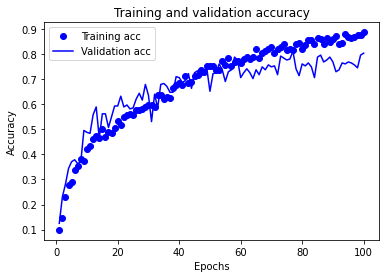

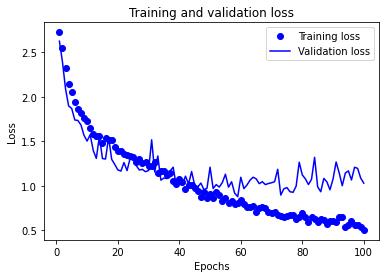

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()